In [2]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
from astropy.table import Table, hstack, vstack
from scipy.stats import ks_2samp, beta
from functools import reduce

import math
import mpl_style
import csv
import hex_scatter as hs

H0 = 70.
cosmo = FlatLambdaCDM(H0, Om0=0.3)
h = H0/100

In [3]:
galaxy_table = Table(fits.getdata('../galaxy_table.fits'))
group_table = Table(fits.getdata('../group_table.fits'))

In [4]:
#cell initializing different indices for use later
#group_table indices
pair_ind = np.where(group_table['n_gal'] == 2)[0]
group_ind = np.where(group_table['n_gal'] > 2)[0]

halo_mass_val_ind = np.where(group_table['halo_mass'] > 2)[0]
cent_mass_val_ind = np.where(group_table['cent_mass'] > 0)[0]

high_sat_sf_ind = np.where(group_table['sat_sf_frac'] > 0.5)
low_sat_sf_ind = np.where(group_table['sat_sf_frac'] < 0.5)

spiral_sat_ind = np.where(group_table['sat_spiral_frac'] > 0.5)[0]
smooth_sat_ind = np.where(group_table['sat_smooth_frac'] > 0.5)[0]
int_sat_ind = np.intersect1d(np.where(group_table['sat_spiral_frac'] <= 0.5)[0], np.where(group_table['sat_smooth_frac'] <= 0.5)[0])

high_mass_halo_ind = np.where(group_table['halo_mass'] >= 13 - np.log10(h))[0]
low_mass_halo_ind = np.where(group_table['halo_mass'] < 13 - np.log10(h))[0]
low_mass_halo_ind = np.intersect1d(low_mass_halo_ind, np.where(group_table['halo_mass'] > 2)[0])

high_mass_cent_ind = np.where(group_table['cent_mass'] >= 10.5)[0]
low_mass_cent_ind = np.where(group_table['cent_mass'] < 10.5)[0]

sf_cent_ind = np.where(group_table['sfing_central'] == 'SFing')[0]
passive_cent_ind = np.where(group_table['sfing_central'] == 'passive')[0]

red_cent_ind = np.where(group_table['cent_redblue'] == 'red')[0]
blue_cent_ind = np.where(group_table['cent_redblue'] == 'blue')[0]

spiral_cent_ind = np.where(group_table['cent_pfeat'] >= 0.8)[0]
smooth_cent_ind = np.where(group_table['cent_pfeat'] <= 0.2)[0]
int_cent_ind = np.intersect1d(np.where(group_table['cent_pfeat'] < 0.8)[0],np.where(group_table['cent_pfeat'] > 0.2)[0])
    
#central morphology/color of groups
redelliptical_cent_ind = np.intersect1d(red_cent_ind, smooth_cent_ind) 
blueelliptical_cent_ind = np.intersect1d(blue_cent_ind, smooth_cent_ind)
redspiral_cent_ind = np.intersect1d(red_cent_ind, spiral_cent_ind)
bluespiral_cent_ind = np.intersect1d(blue_cent_ind, spiral_cent_ind)

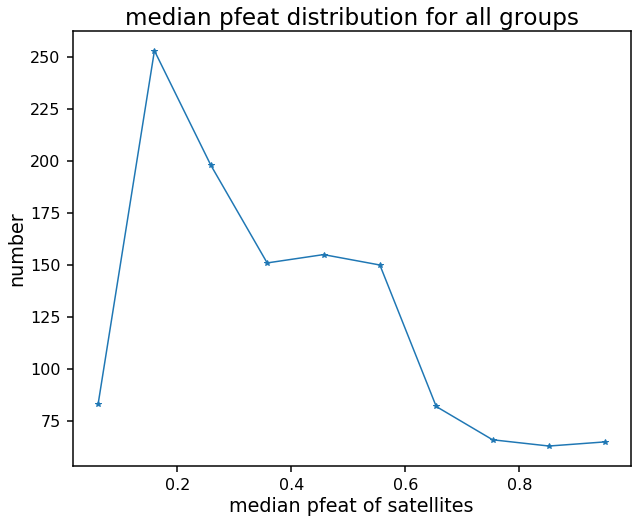

In [10]:
plt.style.use(mpl_style.style1)
f = plt.figure(figsize=(10,8))
   
group_halo_mass_ind = np.intersect1d(halo_mass_val_ind, group_ind)
sat_med_pfeat = group_table['median_sat_pfeat'][group_halo_mass_ind]

hist, bins = np.histogram(sat_med_pfeat, density=False)

plotpts = []
for b in range(len(bins[:-1])):
    plotpts.append(bins[b] + (bins[b+1]-bins[b])/2)
    
plt.plot(plotpts, hist, marker='*')
plt.xlabel('median pfeat of satellites')
plt.ylabel('number')
plt.title('median pfeat distribution for all groups')
plt.show()

[338  34 122 150  76 352  85  17  11  81]


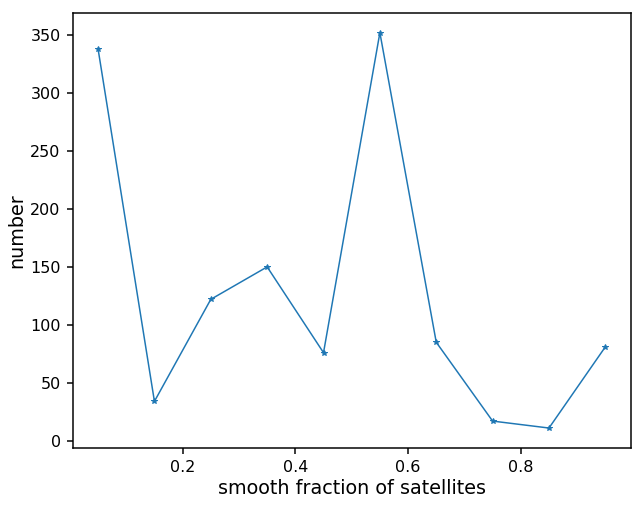

In [18]:
f = plt.figure(figsize=(10,8))
   
group_halo_mass_ind = np.intersect1d(halo_mass_val_ind, group_ind)
sat_frac_smooth_pfeat = group_table['sat_smooth_frac'][group_halo_mass_ind]

hist, bins = np.histogram(sat_frac_smooth_pfeat, density=False)
print(hist)
plotpts = []
for b in range(len(bins[:-1])):
    plotpts.append(bins[b] + (bins[b+1]-bins[b])/2)
    
plt.plot(plotpts, hist, marker='*')
plt.xlabel('smooth fraction of satellites')
plt.ylabel('number')
plt.show()

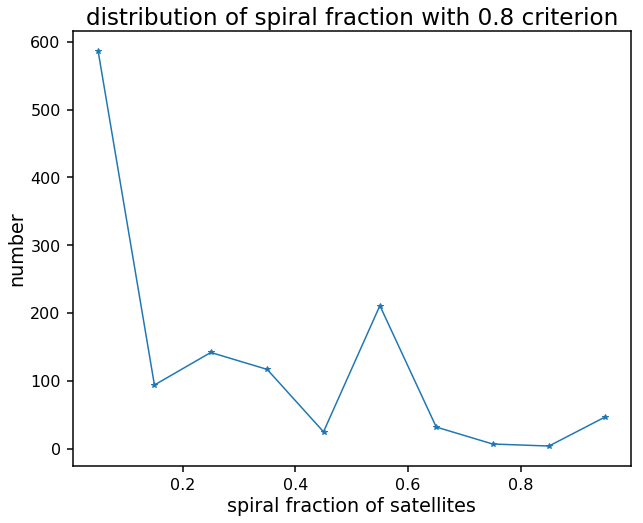

In [16]:
f = plt.figure(figsize=(10,8))
   
group_halo_mass_ind = np.intersect1d(halo_mass_val_ind, group_ind)
sat_frac_spiral_pfeat = group_table['sat_spiral_frac'][group_halo_mass_ind]
sat_frac_smooth_pfeat = group_table['sat_smooth_frac'][group_halo_mass_ind]

hist, bins = np.histogram(sat_frac_spiral_pfeat, density=False)

plotpts = []
for b in range(len(bins[:-1])):
    plotpts.append(bins[b] + (bins[b+1]-bins[b])/2)
    
plt.plot(plotpts, hist, marker='*')
plt.xlabel('spiral fraction of satellites')
plt.ylabel('number')
plt.title('distribution of spiral fraction with 0.8 criterion')
plt.show()

[290  45 136 152  66 326  69  32  16 134]


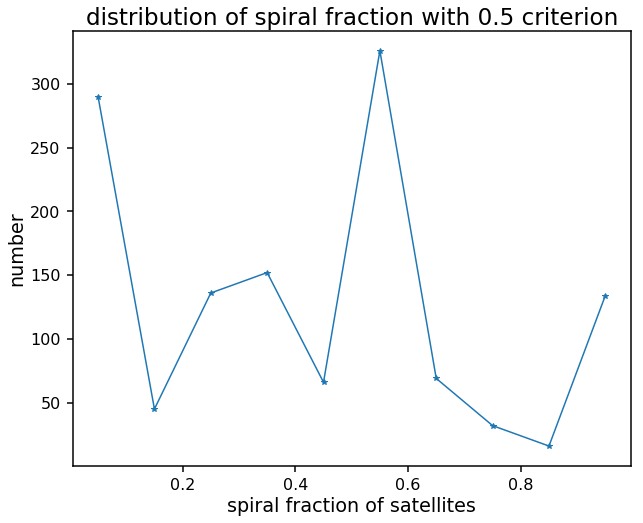

In [19]:
f = plt.figure(figsize=(10,8))
   
group_halo_mass_ind = np.intersect1d(halo_mass_val_ind, group_ind)
sat_frac_spiral_pfeat = group_table['sat_spiral_half_frac'][group_halo_mass_ind]

hist, bins = np.histogram(sat_frac_spiral_pfeat, density=False)
print(hist)
plotpts = []
for b in range(len(bins[:-1])):
    plotpts.append(bins[b] + (bins[b+1]-bins[b])/2)
    
plt.plot(plotpts, hist, marker='*')
plt.xlabel('spiral fraction of satellites')
plt.ylabel('number')
plt.title('distribution of spiral fraction with 0.5 criterion')
plt.show()

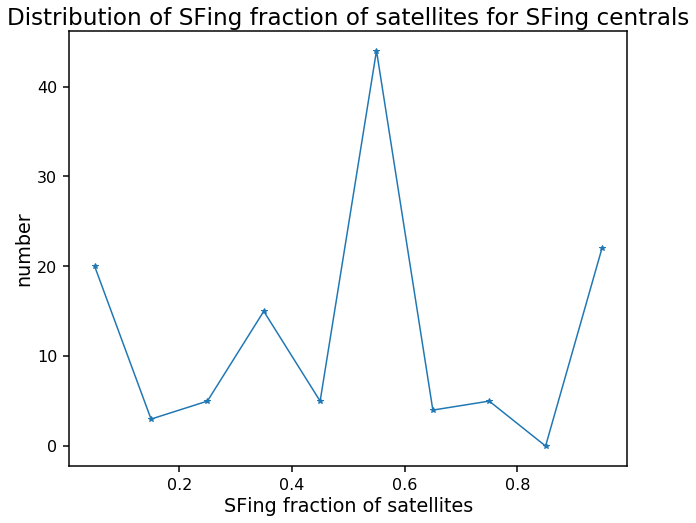

In [13]:
f = plt.figure(figsize=(10,8))

sfing_cent_group_ind = reduce(np.intersect1d, (halo_mass_val_ind, group_ind, sf_cent_ind))
passive_cent_group_ind = reduce(np.intersect1d, (halo_mass_val_ind, group_ind, passive_cent_ind))

sfing_cent_ssfr_frac = group_table['sat_sf_frac'][sfing_cent_group_ind]
passive_cent_ssfr_frac = group_table['sat_sf_frac'][passive_cent_group_ind]

hist, bins = np.histogram(sfing_cent_ssfr_frac, density=False)

plotpts = []
for b in range(len(bins[:-1])):
    plotpts.append(bins[b] + (bins[b+1]-bins[b])/2)
    
plt.plot(plotpts, hist, marker='*')
plt.xlabel('SFing fraction of satellites')
plt.ylabel('number')
plt.title('Distribution of SFing fraction of satellites for SFing centrals')
plt.show()

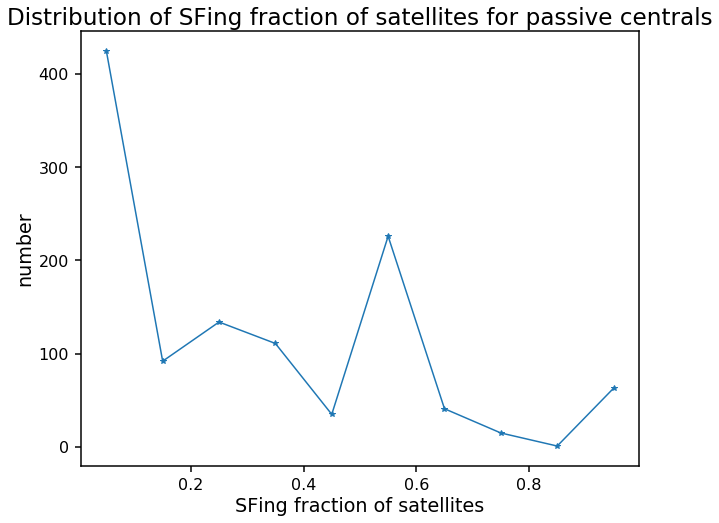

In [11]:
f = plt.figure(figsize=(10,8))

passive_cent_group_ind = reduce(np.intersect1d, (halo_mass_val_ind, group_ind, passive_cent_ind))

passive_cent_ssfr_frac = group_table['sat_sf_frac'][passive_cent_group_ind]

hist, bins = np.histogram(passive_cent_ssfr_frac, density=False)

plotpts = []
for b in range(len(bins[:-1])):
    plotpts.append(bins[b] + (bins[b+1]-bins[b])/2)
    
plt.plot(plotpts, hist, marker='*')
plt.xlabel('SFing fraction of satellites')
plt.ylabel('number')
plt.title('Distribution of SFing fraction of satellites for passive centrals')
plt.show()

In [19]:
print('number of featured satellite systems based on median', len(np.where(sat_med_pfeat >= 0.8)[0]))
print('number of featured satellite systems based on fraction', len(np.where(sat_frac_spiral_pfeat > 0.5)[0]))

('number of featured satellite systems based on median', 129)
('number of featured satellite systems based on fraction', 102)


In [22]:
#look at overlap of the two classifications:
print('number of groups with spiral satellites in both criteria', len(np.intersect1d(np.where(sat_med_pfeat >= 0.8)[0], np.where(sat_frac_pfeat > 0.5)[0])))

('number of groups with spiral satellites in both criteria', 102)


In [23]:
print('number of smooth satellite systems based on median', len(np.where(sat_med_pfeat <= 0.2)[0]))
print('number of smooth satellite systems based on fraction', len(np.where(sat_frac_smooth_pfeat > 0.5)[0]))
print('number of groups with spiral satellites in both criteria', len(np.intersect1d(np.where(sat_med_pfeat <= 0.2)[0], np.where(sat_frac_smooth_pfeat > 0.5)[0])))

('number of smooth satellite systems based on median', 315)
('number of smooth satellite systems based on fraction', 241)
('number of groups with spiral satellites in both criteria', 241)
